# Proyek Analisis Data: Air Quality Dataset [Shunyi]
- **Nama:** Azel Fabian Azmi
- **Email:** azelfa65@gmail.com
- **ID Dicoding:** MC314D5Y0547

## Menentukan Pertanyaan Bisnis
- Bagaimana tren polusi udara tahunan dalam kualitas udara di Shunyi?
- Bagaimana hubungan antara curah hujan dengan masing-masing partikel polusi?

## Import Semua Packages/Library yang Digunakan

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

- Mengumpulkan dan menampilkan data

In [3]:
shunyi_df = pd.read_csv("data/PRSA_Data_Shunyi_20130301-20170228.csv") #Membaca file csv dari file lokal
shunyi_df.head() #Menampilkan 5 baris pertama dari DataFrame

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,3.0,6.0,3.0,8.0,300.0,44.0,-0.9,1025.8,-20.5,0.0,NW,9.3,Shunyi
1,2,2013,3,1,1,12.0,12.0,3.0,7.0,300.0,47.0,-1.1,1026.1,-21.3,0.0,NW,9.4,Shunyi
2,3,2013,3,1,2,14.0,14.0,NaN,7.0,200.0,22.0,-1.7,1026.2,-23.0,0.0,NW,8.6,Shunyi
3,4,2013,3,1,3,12.0,12.0,3.0,5.0,NaN,NaN,-2.1,1027.3,-23.3,0.0,NW,6.6,Shunyi
4,5,2013,3,1,4,12.0,12.0,3.0,NaN,200.0,11.0,-2.4,1027.7,-22.9,0.0,NW,4.5,Shunyi


In [4]:
shunyi_df.tail()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
35059,35060,2017,2,28,19,27.0,72.0,8.0,92.0,800.0,16.0,10.3,1014.2,-12.4,0.0,W,1.8,Shunyi
35060,35061,2017,2,28,20,47.0,55.0,17.0,86.0,1100.0,19.0,9.8,1014.5,-9.9,0.0,NW,1.5,Shunyi
35061,35062,2017,2,28,21,18.0,28.0,4.0,30.0,500.0,64.0,9.1,1014.6,-12.7,0.0,NE,1.7,Shunyi
35062,35063,2017,2,28,22,18.0,20.0,9.0,33.0,500.0,59.0,7.1,1015.2,-13.2,0.0,WNW,1.8,Shunyi
35063,35064,2017,2,28,23,15.0,22.0,13.0,34.0,500.0,60.0,7.4,1014.9,-11.9,0.0,N,1.4,Shunyi


**Insight**
- Memiliki 35,064 data
- Data dimulai dari 1 Maret 2013 sampai 28 Febuari 2017
- Terdapat nilai-nilai pengukuran kulitas udara yaitu PM2.5, PM10, SO2, NO2, CO, O3, temperatur udara (TEMP), tekanan udara (PRES), titik embun (DEWP), hujan (RAIN), dan kecepatan angin (WSPM)

### Asessing Data

- Memeriksa tipe data data dari tiap kolom

In [5]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34151 non-null  float64
 6   PM10     34516 non-null  float64
 7   SO2      33768 non-null  float64
 8   NO2      33699 non-null  float64
 9   CO       32886 non-null  float64
 10  O3       33575 non-null  float64
 11  TEMP     35013 non-null  float64
 12  PRES     35013 non-null  float64
 13  DEWP     35010 non-null  float64
 14  RAIN     35013 non-null  float64
 15  wd       34581 non-null  object 
 16  WSPM     35020 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


- Missing Values

In [6]:
shunyi_df.isna().sum() #Memeriksa data yang tidak bernilai

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

- Duplcated Data

In [7]:
print("Jumlah duplikasi: ", shunyi_df.duplicated().sum()) #Memeriksa duplikasi data

Jumlah duplikasi:  0


- Describe Data

In [8]:
shunyi_df.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34151.000000,34516.000000,33768.000000,33699.000000,32886.000000,33575.000000,35013.000000,35013.000000,35010.000000,35013.000000,35020.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.491602,98.737026,13.572039,43.908865,1187.063979,55.201321,13.387969,1013.061938,2.465036,0.061094,1.807533
std,10122.249256,1.177213,3.448752,8.800218,6.922285,81.231739,89.143718,19.572068,30.996828,1156.374102,54.873726,11.483588,10.177339,13.726622,0.761668,1.287817
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,19.000000,31.000000,2.000000,19.000000,400.000000,10.000000,3.000000,1004.700000,-8.800000,0.000000,1.000000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,77.000000,5.000000,37.000000,800.000000,43.000000,14.400000,1012.700000,3.100000,0.000000,1.500000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,112.000000,138.000000,17.000000,62.000000,1500.000000,77.000000,23.200000,1021.000000,15.100000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,941.000000,999.000000,239.000000,258.000000,10000.000000,351.716400,40.600000,1042.800000,27.500000,37.300000,12.800000


In [9]:
polusi = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]

**Insight**
- Terdapat ada 2718 baris yang tidak memiliki nilai
- Tidak ada nilai yang terduplikat
- Polutan polusi yang ada adalah PM2.5, PM10, SO2, NO2, CO, dan O3

### Cleaning Data

- Menangani missing value

In [10]:
shunyi_df[shunyi_df["PM2.5"].isna()]

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
204,205,2013,3,9,12,NaN,NaN,NaN,NaN,NaN,90.0,12.7,1006.6,-15.1,0.0,NNW,9.9,Shunyi
205,206,2013,3,9,13,NaN,NaN,NaN,NaN,NaN,90.0,10.4,1009.0,-16.0,0.0,NW,7.6,Shunyi
206,207,2013,3,9,14,NaN,NaN,NaN,NaN,NaN,90.0,9.8,1010.4,-17.4,0.0,NW,6.2,Shunyi
207,208,2013,3,9,15,NaN,NaN,NaN,NaN,NaN,90.0,9.7,1011.7,-17.5,0.0,NNW,5.9,Shunyi
208,209,2013,3,9,16,NaN,NaN,NaN,NaN,NaN,90.0,10.3,1013.1,-17.9,0.0,NNW,6.2,Shunyi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34880,34881,2017,2,21,8,NaN,NaN,NaN,NaN,NaN,NaN,-2.1,1029.7,-15.5,0.0,E,0.6,Shunyi
34883,34884,2017,2,21,11,NaN,NaN,NaN,NaN,NaN,NaN,-0.2,1028.9,-14.2,0.0,SE,1.3,Shunyi
34885,34886,2017,2,21,13,NaN,NaN,NaN,NaN,NaN,NaN,-0.1,1027.8,-8.5,0.0,S,3.6,Shunyi
34936,34937,2017,2,23,16,NaN,NaN,2.0,14.0,300.0,84.0,8.1,1022.5,-15.5,0.0,WNW,3.9,Shunyi


In [11]:
shunyi_df.isna().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       913
PM10        548
SO2        1296
NO2        1365
CO         2178
O3         1489
TEMP         51
PRES         51
DEWP         54
RAIN         51
wd          483
WSPM         44
station       0
dtype: int64

Karena dengan data-data yang banyak dan dimana kita harus memerlukan data asli tidak dapat diganti dengan nilai ganti (mean,modus,dan lain-lain), maka disarankan untuk menghilangkan data hilang. Data yang akan hilang merupakan 6% dari total data.

In [12]:
shunyi_df.dropna(inplace=True)

In [13]:
shunyi_df.isna().sum() #Memeriksa data yang tidak bernilai

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

- Drop Column

In [14]:
shunyi_df = shunyi_df.drop(['No','station'], axis=1)

- Info Data

In [15]:
shunyi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30194 entries, 0 to 35063
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    30194 non-null  int64  
 1   month   30194 non-null  int64  
 2   day     30194 non-null  int64  
 3   hour    30194 non-null  int64  
 4   PM2.5   30194 non-null  float64
 5   PM10    30194 non-null  float64
 6   SO2     30194 non-null  float64
 7   NO2     30194 non-null  float64
 8   CO      30194 non-null  float64
 9   O3      30194 non-null  float64
 10  TEMP    30194 non-null  float64
 11  PRES    30194 non-null  float64
 12  DEWP    30194 non-null  float64
 13  RAIN    30194 non-null  float64
 14  wd      30194 non-null  object 
 15  WSPM    30194 non-null  float64
dtypes: float64(11), int64(4), object(1)
memory usage: 3.9+ MB


**Insight**
- Dengan adanya data yang tidak memiliki nilai dalam beberapa baris (6% baris yang terpengaruh), maka dianjurkan menghapus baris-baris tersebut karena masih terbilang nominal data sisanya masih aman dan banyak.
- Kolom-kolom seperti 'No' dan 'Station' itu tidak penting karena kolom tersebut isinya tidak mempengaruhi analisa.

## Exploratory Data Analysis (EDA)

- Mengeksplorasi Parameter Statistik dari Data

In [16]:
shunyi_df.describe(include="all") #Melihat rangkuman parameter statistik

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
count,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194.000000,30194,30194.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NNE,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3900,NaN
mean,2014.672286,6.477214,15.797244,11.750447,79.400725,99.380546,14.144105,44.838483,1201.778267,55.297919,12.787637,1013.648045,1.542873,0.055150,NaN,1.842306
std,1.162176,3.531983,8.782419,6.881524,81.222687,89.806815,20.111407,30.988580,1157.599187,54.106029,11.451568,10.120229,13.657590,0.711516,NaN,1.294560
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,988.000000,-36.000000,0.000000,NaN,0.000000
25%,2014.000000,3.000000,8.000000,6.000000,19.000000,31.000000,2.000000,20.000000,400.000000,11.000000,2.500000,1005.400000,-9.600000,0.000000,NaN,1.000000
50%,2015.000000,6.000000,16.000000,12.000000,55.000000,77.000000,5.000000,38.000000,900.000000,44.000000,13.300000,1013.400000,1.400000,0.000000,NaN,1.500000
75%,2016.000000,10.000000,23.000000,18.000000,111.000000,140.000000,18.000000,63.000000,1500.000000,77.000000,22.600000,1021.600000,14.100000,0.000000,NaN,2.300000


array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'PM2.5'}>,
        <Axes: title={'center': 'PM10'}>,
        <Axes: title={'center': 'SO2'}>, <Axes: title={'center': 'NO2'}>],
       [<Axes: title={'center': 'CO'}>, <Axes: title={'center': 'O3'}>,
        <Axes: title={'center': 'TEMP'}>,
        <Axes: title={'center': 'PRES'}>],
       [<Axes: title={'center': 'DEWP'}>,
        <Axes: title={'center': 'RAIN'}>,
        <Axes: title={'center': 'WSPM'}>, <Axes: >]], dtype=object)

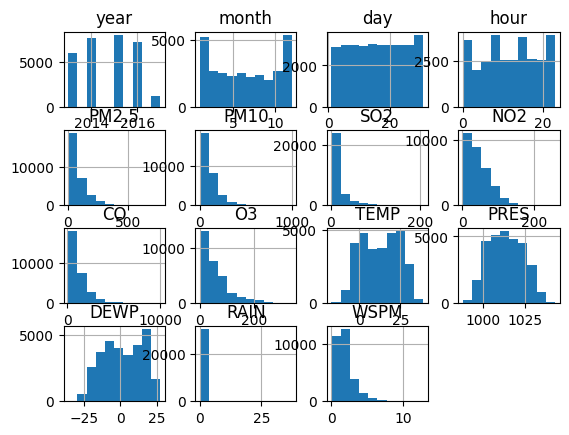

In [17]:
shunyi_df.hist()

In [18]:
shunyi_df.skew(numeric_only=True)

year      0.064200
month     0.020911
day       0.001615
hour     -0.051784
PM2.5     1.958114
PM10      1.886744
SO2       2.841913
NO2       1.037956
CO        2.570672
O3        1.501829
TEMP     -0.031386
PRES      0.090007
DEWP     -0.126706
RAIN     25.807645
WSPM      1.762424
dtype: float64

In [19]:
shunyi_df.corr(numeric_only=True)

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
year,1.000000,-0.222058,-0.001542,0.002715,-0.020233,-0.052338,-0.107124,0.008627,0.003964,0.004185,-0.128026,0.150039,-0.139601,0.007126,0.053123
month,-0.222058,1.000000,0.024129,-0.002997,-0.019264,-0.028240,-0.214333,0.004767,0.045981,-0.115598,0.124744,-0.045789,0.253755,0.013140,-0.122475
day,-0.001542,0.024129,1.000000,-0.002627,0.003562,0.021086,-0.000487,0.017331,-0.017154,0.004278,0.010115,0.031684,0.029485,0.002451,-0.015187
hour,0.002715,-0.002997,-0.002627,1.000000,0.014425,0.055589,0.060917,0.083457,-0.014390,0.281662,0.141264,-0.045058,-0.007471,0.014338,0.104614
PM2.5,-0.020233,-0.019264,0.003562,0.014425,1.000000,0.901220,0.468943,0.659198,0.790409,-0.140249,-0.106118,-0.013666,0.143352,-0.009901,-0.280318
PM10,-0.052338,-0.028240,0.021086,0.055589,0.901220,1.000000,0.469315,0.664044,0.717450,-0.123303,-0.069229,-0.049945,0.115118,-0.022811,-0.210138
SO2,-0.107124,-0.214333,-0.000487,0.060917,0.468943,0.469315,1.000000,0.512635,0.513114,-0.162991,-0.307170,0.206147,-0.246209,-0.039397,-0.137914
NO2,0.008627,0.004767,0.017331,0.083457,0.659198,0.664044,0.512635,1.000000,0.674900,-0.466680,-0.300705,0.142291,-0.064818,-0.052534,-0.403374
CO,0.003964,0.045981,-0.017154,-0.014390,0.790409,0.717450,0.513114,0.674900,1.000000,-0.290513,-0.289119,0.140269,-0.016277,-0.007693,-0.299420
O3,0.004185,-0.115598,0.004278,0.281662,-0.140249,-0.123303,-0.162991,-0.466680,-0.290513,1.000000,0.595416,-0.436859,0.308582,0.026925,0.308850


**Insight**
- Data PM2.5, PM10, SO2, NO2, CO, O3 , RAIN, dan WSPM adalah data distribusi right-skewed, sedangkan data TEMP, PRES, DEWP cenderung ke distribusi data simetris sempurna
- **PM2.5** memiliki korelasi positif terhadap **PM10, SO2, NO2, CO, dan DEWP**. Kemudian memiliki korelasi negatif terhadap **O3, dan WSPM**. Kemudian juga memiliki korelasi hampir netral terhadap **PRES dan RAIN**
- **PM10** memiliki korelasi positif terhadap **PM2.5, SO2, NO2, CO, dan DEWP**. Kemudian memiliki korelasi negatif terhadap **O3 dan WSPM**. Kemdiaan juga memiliki korelasi hampir netral terhadap **PRES dan RAIN**
- **SO2** Memiliki korelasi positif terhadap **PM2.5, PM10, NO2, CO2, dan PRES**. Kemudian memiliki korelasi negatif terhadap **O3, TEMP, DEWP, dan WSPM**. Kemudian juga memiliki korelasi hampir netral terhadap **RAIN**
- **NO2** memiliki korelasi positif terhadap **PM2.5, PM10, SO2, CO, dan PRES**. Kemudian memiliki korelasi negatif terhadap **O3, TEMP, dan WSPM**. Kemudian juga memiliki korelasi hampir netral terhadap **DEWP dan RAIN**
- **CO** memiliki korelasi positif terhadap **PM2.5, PM10, SO2, NO2, dan PRES**. Kemudian memiliki korelasi negatif terhadap **O3, TEMP, dan WSPM**. Kemudian juga memiliki korelasi hampir netral terhadap **DEWP dan RAIN**
- **O3** memiliki korelasi positif terhadap **TEMP, DEWP, dan WSPM**. Kemudian memiliki korelasi negatif terhadap **PM2.5, PM10, SO2, NO2, CO, dan PRES**. Kemudian juga memiliki korelasi hampir netral terhadap **RAIN**
- **TEMP** memiliki korelasi positif terhadap **O3 dan DEWP**. Kemudian memiliki korelasi negatif terhadap **PM2.5, SO2, NO2, CO, PRES**. Kemudian juga memiliki korelasi hampir netral terhadap **PM10, RAIN, dan WSPM**
- **PRES** memiliki korelasi positif terhadap **SO2, NO2, dan CO**. Kemudian memiliki korelasi negatif terhadap **O3, TEMP, dan DEWP**. Kemudian juga memiliki korelasi hampir netral terhadap **PM2.5, PM10, RAIN, WSPM**
- **DEWP** memiliki korelasi positif terhadap **PM2.5, PM10, O3, dan TEMP**. Kemudian memiliki korelasi negatif terhadap **SO2, PRES, dan WSPM**. Kemudian juga memiliki korelasi hampir netral terhadap **NO2, CO, dan RAIN**
- **RAIN** hanya memiliki korelasi netral terhadap semua data
- **WSPM** memiliki korelasi positif terhadap **O3**. Kemudian memiliki korelasi negatif terhadap **PM2.5, PM10, SO2, CO, dan DEWP**. Kemudian juga memiliki korelasi hampir netral terhadap **TEMP, PRES, dan RAIN**

- Mengelompokkan Data

In [33]:
df_yearly = shunyi_df.groupby("year")[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].agg({
    "PM2.5": ["mean", "min", "max"], 
    "PM10": ["mean", "min", "max"] ,
    "SO2": ["mean", "min", "max"] ,
    "NO2": ["mean", "min", "max"] , 
    "CO": ["mean", "min", "max"], 
    "O3": ["mean", "min", "max"]
})
df_yearly

PM2.5                          PM10                           SO2  \
          mean       min       max      mean       min       max      mean   
year                                                                         
2013  0.100786  0.001316  0.731579  0.097220  0.000000  0.764293  0.076518   
2014  0.108614  0.001316  0.776316  0.109323  0.001003  0.903711  0.084054   
2015  0.103326  0.001316  0.903947  0.097582  0.001003  1.000000  0.047154   
2016  0.090890  0.001316  0.927632  0.084989  0.001003  0.917753  0.044502   
2017  0.118439  0.000000  1.000000  0.101737  0.001003  0.951856  0.095155   

                               NO2                       CO                 \
           min       max      mean  min       max      mean  min       max   
year                                                                         
2013  0.000000  0.805825  0.164170  0.0  0.789062  0.116014  0.0  0.868687   
2014  0.000000  1.000000  0.174176  0.0  0.789062  0.110045  0.0  0.757576   
2015  0.004854  0.771845  0.162029  0.0  0.921875  0.109260  0.0  1.000000   
2016  0.004854  0.980583  0.162636  0.0  0.753906  0.101847  0.0  0.989899   
2017  0.004854  0.757282  0.200513  0.0  1.000000  0.162378  0.0  0.959596   

            O3                      
          mean       min       max  
year                                
2013  0.155925  0.000000  0.885222  
2014  0.166818  0.002313  0.979399  
2015  0.158505  0.005256  1.000000  
2016  0.172339  0.002313  0.997057  
2017  0.127790  0.002313  0.508514

**Insight**
- Rata-rata PM2.5 dan PM10 mengalami sedikit penurunan dari 2013 hingga 2016, tetapi kembali meningkat pada 2017.
- Rata-rata SO2 turun drastis di tahun 2015 (0.047) dan 2016 (0.044) dibandingkan dengan tahun sebelumnya.
- NO2 dan CO relatif stabil sepanjang tahun.
- Rata-rata O3 meningkat dari 2013 ke 2016.

In [ ]:
df_rain =shunyi_df.groupby(pd.cut(shunyi_df["RAIN"], bins=[0, 0.1, 5, 15, 30, 40]))[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].agg({
    "PM2.5": ["mean", "min", "max"], 
    "PM10": ["mean", "min", "max"] ,
    "SO2": ["mean", "min", "max"] ,
    "NO2": ["mean", "min", "max"] , 
    "CO": ["mean", "min", "max"], 
    "O3": ["mean", "min", "max"]
})
df_rain


C:\Users\Administrator\AppData\Local\Temp\ipykernel_4116\1224649913.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_rain =shunyi_df.groupby(pd.cut(shunyi_df["RAIN"], bins=[0, 0.1, 5, 15, 30, 40]))[["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]].agg({


PM2.5                          PM10                      \
                  mean       min       max      mean       min       max   
RAIN                                                                       
(0.0, 0.1]    0.084605  0.001316  0.511842  0.068753  0.001003  0.334002   
(0.1, 5.0]    0.078264  0.001316  0.725000  0.066600  0.003009  0.555667   
(5.0, 15.0]   0.093375  0.001316  0.476316  0.071794  0.003009  0.310933   
(15.0, 30.0]  0.085432  0.014474  0.193421  0.070067  0.011033  0.147442   
(30.0, 40.0]  0.143860  0.011842  0.235526  0.116349  0.014042  0.194584   

                   SO2                           NO2                       CO  \
                  mean       min       max      mean  min       max      mean   
RAIN                                                                            
(0.0, 0.1]    0.020813  0.000000  0.791262  0.111751  0.0  0.457031  0.110865   
(0.1, 5.0]    0.017744  0.000000  0.582524  0.113548  0.0  0.671875  0.107339   
(5.0, 15.0]   0.011838  0.004854  0.145631  0.071664  0.0  0.242188  0.092325   
(15.0, 30.0]  0.010402  0.004854  0.038835  0.059989  0.0  0.117188  0.091631   
(30.0, 40.0]  0.027508  0.004854  0.038835  0.079427  0.0  0.164062  0.148148   

                                        O3                      
                   min       max      mean       min       max  
RAIN                                                            
(0.0, 0.1]    0.000000  1.000000  0.136453  0.002313  0.608577  
(0.1, 5.0]    0.000000  1.000000  0.145727  0.002313  0.685096  
(5.0, 15.0]   0.020202  0.282727  0.259595  0.002313  0.646836  
(15.0, 30.0]  0.030303  0.222222  0.230608  0.022914  0.511457  
(30.0, 40.0]  0.040404  0.292929  0.305445  0.164179  0.535001

Membagi curah hujan menjadi beberapa kelompok:

- 0 mm (Tidak hujan)
- 0.1 - 5 mm (Hujan ringan)
- 5.1 - 15 mm (Hujan sedang)
- 15.1 - 30 mm (Hujan lebat)
- 30.1 - 40 mm (Hujan sangat lebat)

**Insight**
- PM2.5 dan PM10 cenderung lebih rendah saat curah hujan lebat, tetapi meningkat ketika hujan sangat lebat.
- SO2 dan NO2 mengalami sedikit kenaikan tetapi tidak menurun drastis meskipun ada hujan.
- CO justru meningkat pada hujan tinggi.
- O3 meningkat ketika curah hujan lebih tinggi, mencapai puncaknya pada hujan sangat lebat.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren polusi udara tahunan dalam kualitas udara di Shunyi?

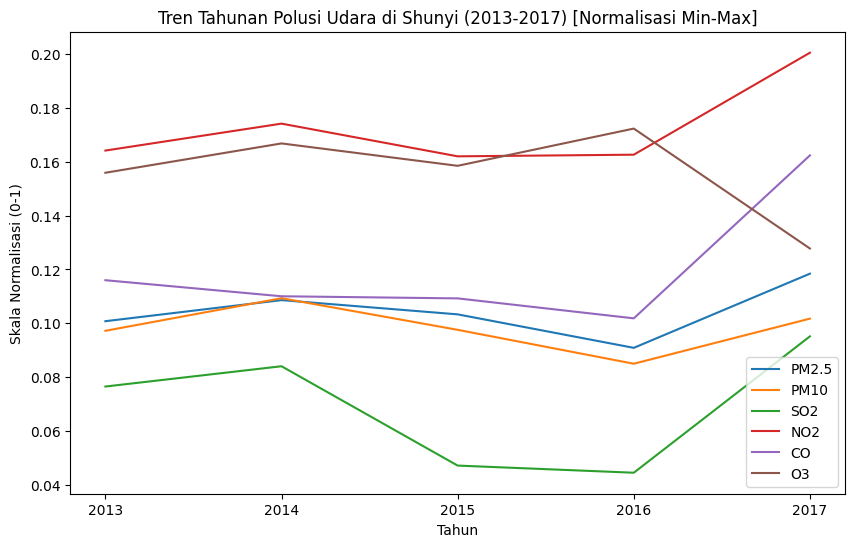

In [21]:
#Meng-import library 
from sklearn.preprocessing import MinMaxScaler

#Inisialisasi scaler
scaler = MinMaxScaler()

#Normalisasi data polusi(0-1) agar nilainya seimbang
shunyi_normalisasi = shunyi_df
shunyi_normalisasi[polusi] = scaler.fit_transform(shunyi_df[polusi])

polusi_trends = shunyi_normalisasi.groupby("year")[polusi].mean().reset_index()

plt.figure(figsize=(10, 6))

for i in polusi:
    plt.plot(polusi_trends['year'], polusi_trends[i], label=i)

plt.title("Tren Tahunan Polusi Udara di Shunyi (2013-2017) [Normalisasi Min-Max]")
plt.xlabel("Tahun")
plt.ylabel("Skala Normalisasi (0-1)")
plt.xticks(polusi_trends['year'])
plt.legend()

plt.show()

**Insight**
- Partikel NO2 dan O3 memiliki tren yang agak stabil dari 2013-2016
- Partikel SO2 mengalami penurunan dari tahun 2014 hingga 2016
- Semua partikel pada tahun 2017 mengalami perbandingan yang signifikan karena data pada tahun 2017 hanya sedikit yaitu 2 bulan saja

### Pertanyaan 2: Bagaimana hubungan antara curah hujan dengan masing-masing partikel polusi?

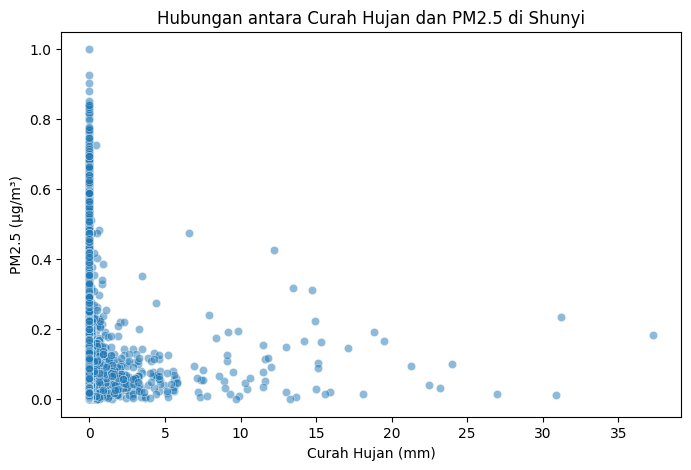

In [22]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=shunyi_df["RAIN"], y=shunyi_df["PM2.5"], alpha=0.5)

plt.title("Hubungan antara Curah Hujan dan PM2.5 di Shunyi")
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("PM2.5 (µg/m³)")

plt.show()

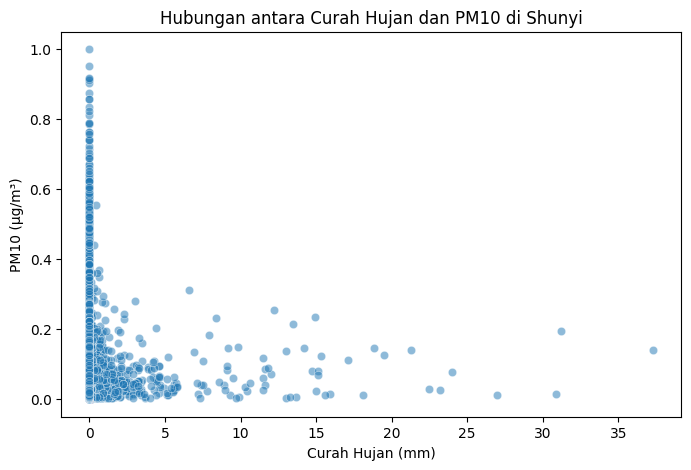

In [23]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=shunyi_df["RAIN"], y=shunyi_df["PM10"], alpha=0.5)

plt.title("Hubungan antara Curah Hujan dan PM10 di Shunyi")
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("PM10 (µg/m³)")

plt.show()

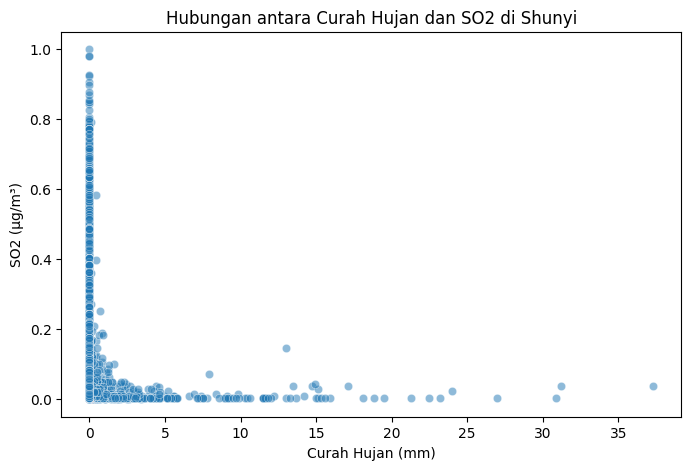

In [24]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=shunyi_df["RAIN"], y=shunyi_df["SO2"], alpha=0.5)

plt.title("Hubungan antara Curah Hujan dan SO2 di Shunyi")
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("SO2 (µg/m³)")

plt.show()

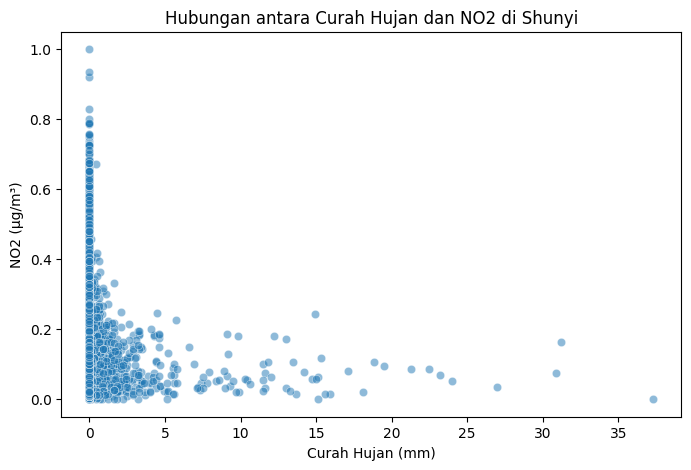

In [25]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=shunyi_df["RAIN"], y=shunyi_df["NO2"], alpha=0.5)

plt.title("Hubungan antara Curah Hujan dan NO2 di Shunyi")
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("NO2 (µg/m³)")

plt.show()

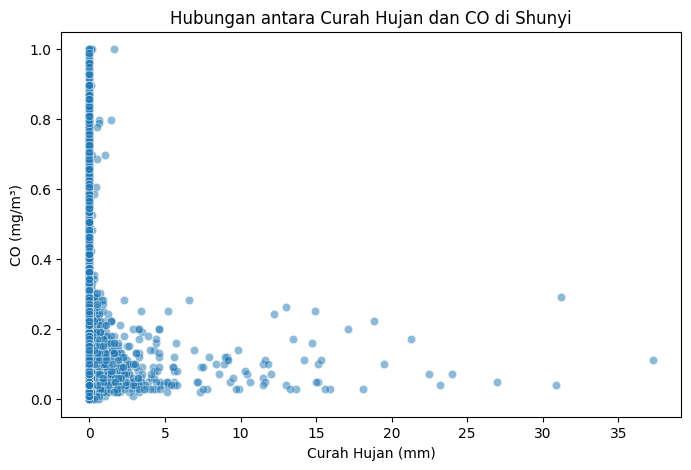

In [26]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=shunyi_df["RAIN"], y=shunyi_df["CO"], alpha=0.5)

plt.title("Hubungan antara Curah Hujan dan CO di Shunyi")
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("CO (mg/m³)")

plt.show()

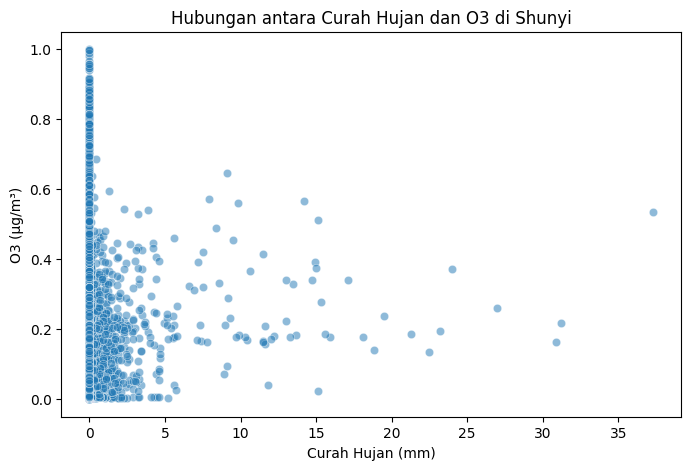

In [27]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=shunyi_df["RAIN"], y=shunyi_df["O3"], alpha=0.5)

plt.title("Hubungan antara Curah Hujan dan O3 di Shunyi")
plt.xlabel("Curah Hujan (mm)")
plt.ylabel("O3 (µg/m³)")

plt.show()

**Insight**
- Curah hujan dapat membersihkan partikel-partikel polusi

### Conclusion

**Tren Polusi Udara per Tahun**

- Secara umum, kualitas udara di Shunyi menunjukkan perbaikan dalam beberapa tahun terakhir, terutama pada polutan SO2 dan PM10, yang mengalami penurunan signifikan.
- Penurunan ini kemungkinan besar dipengaruhi oleh regulasi lingkungan yang lebih ketat dan peningkatan kesadaran akan polusi udara.
- Namun, NO2 dan CO masih menunjukkan tingkat yang relatif tinggi, yang mengindikasikan bahwa sumber polusi seperti kendaraan bermotor dan industri tetap menjadi tantangan utama.

**Hubungan Curah Hujan dengan Polusi Udara**

- Data menunjukkan bahwa hujan memiliki dampak signifikan dalam mengurangi partikel polusi seperti PM2.5 dan PM10, yang menunjukkan adanya mekanisme pencucian udara oleh hujan (rain scavenging).
- Namun, untuk gas polutan seperti SO2, NO2, dan O3, hujan tidak memiliki pengaruh yang signifikan. Hal ini bisa disebabkan oleh sifat gas-gas tersebut yang lebih mudah bereaksi dengan zat lain di atmosfer dibandingkan larut dalam air hujan.
- Pernyataan ini menegaskan bahwa meskipun curah hujan dapat membantu mengurangi partikel polusi, strategi pengurangan emisi dari sumber utama polusi udara tetap diperlukan untuk meningkatkan kualitas udara secara keseluruhan.

Pemerintah dan masyarakat dapat memahami bahwa hujan memang berkontribusi dalam membersihkan udara, tetapi upaya pengendalian polusi tetap diperlukan agar kualitas udara terus membaik.